In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd

In [2]:
def read_directory(directory_name):
    X,Y= [],[]
    for filename in os.listdir(directory_name):
        image = cv2.imread(directory_name+"/"+filename)
        X.append(image)
        Y.append(int(filename[0]))
    X = np.array(X).astype(np.float64)/255
    Y = np.array(Y)
    return X,Y

In [11]:
X,Y = read_directory("data_set/mnist")
X,X_test,Y,Y_test = X[::2],X[1::2],Y[::2],Y[1::2]
epochs = 100

In [16]:
model = keras.Sequential(
    [   
        keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(28,28,3,)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128,activation='relu',name = 'DENSE_1'),
        keras.layers.Dense(units=10,activation='relu',name = 'DENSE_2'),
        keras.layers.Softmax(name = 'OUT_PUT')
     
    ]
)
model.compile(
            optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
            )
train_history = model.fit(X,Y,epochs=epochs) 
model.summary() 

Epoch 1/100
657/657 [==============================] - 5s 7ms/step - loss: 0.4477 - accuracy: 0.9164
Epoch 2/100
657/657 [==============================] - 4s 7ms/step - loss: 0.2890 - accuracy: 0.9752
Epoch 3/100
657/657 [==============================] - 4s 7ms/step - loss: 0.2628 - accuracy: 0.9845
Epoch 4/100
657/657 [==============================] - 5s 7ms/step - loss: 0.2516 - accuracy: 0.9880
Epoch 5/100
657/657 [==============================] - 4s 6ms/step - loss: 0.2422 - accuracy: 0.9933
Epoch 6/100
657/657 [==============================] - 4s 7ms/step - loss: 0.2407 - accuracy: 0.9937
Epoch 7/100
657/657 [==============================] - 4s 7ms/step - loss: 0.2387 - accuracy: 0.9945
Epoch 8/100
657/657 [==============================] - 5s 7ms/step - loss: 0.2356 - accuracy: 0.9962
Epoch 9/100
657/657 [==============================] - 4s 7ms/step - loss: 0.2365 - accuracy: 0.9961
Epoch 10/100
657/657 [==============================] - 5s 7ms/step - loss: 0.2333 - accura

In [19]:
cap  = cv2.VideoCapture(0)
if not cap.isOpened():
     print("无法检测到摄像头")
     exit()
else:
     for i in range(0, 19):
          print(cap.get(i))
     while(1):
          ret, frame = cap.read() #ret为布尔值是否读取到图片 fram为读取的图像
          cv2.imshow(u"frame", frame)
          target_image = frame[0:480,80:560,:]
          cv2.imshow(u"target_image", target_image)
          process_image = cv2.bitwise_not(target_image) #黑白反转
          nbcs,process_image = cv2.threshold(process_image,175,255,cv2.THRESH_BINARY) 
          process_image = cv2.resize(process_image,(28,28))
          cv2.imshow(u"process_image",process_image)
          key = cv2.waitKey(1)
          if key & 0xff == ord('q') :
               print("结束")
               break
          if key & 0xff == ord('p') :
               test_list = []
               test_jpg = process_image
               test_list.append(test_jpg)
               test_list = np.array(test_list).astype(np.float64)/255
               predictions = model.predict(test_list)
               print(predictions)
               print(np.argmax(predictions[0]))
          
     cap.release()
     cv2.destroyAllWindows()

0.0
0.0
-1.0
640.0
480.0
30.0
22.0
-1.0
-1.0
1.0
128.0
32.0
64.0
0.0
-1.0
-6.0
1.0
1.0
1.0
1/1 [==============================] - 0s 58ms/step
[[1.4560907e-15 1.4560907e-15 1.4560907e-15 1.4560907e-15 1.4560907e-15
  1.4560907e-15 1.0000000e+00 1.4560907e-15 9.4537801e-14 1.4560908e-15]]
6
1/1 [==============================] - 0s 15ms/step
[[3.117227e-15 3.117227e-15 3.117227e-15 3.117227e-15 3.117227e-15
  3.117227e-15 1.000000e+00 3.117227e-15 2.495334e-12 3.117227e-15]]
6
1/1 [==============================] - 0s 13ms/step
[[1.5395737e-18 1.5395737e-18 1.5395737e-18 1.5395737e-18 1.5395737e-18
  1.5395737e-18 1.0000000e+00 1.5395737e-18 1.5395737e-18 1.5395737e-18]]
6
1/1 [==============================] - 0s 14ms/step
[[2.0094038e-11 1.5704225e-09 2.0094038e-11 2.0094038e-11 2.0094038e-11
  2.0094038e-11 2.0094038e-11 1.0000000e+00 2.0094036e-11 1.6150494e-09]]
7
1/1 [==============================] - 0s 14ms/step
[[3.9544975e-06 2.9210575e-04 3.9544975e-06 3.9544975e-06 3.9544975

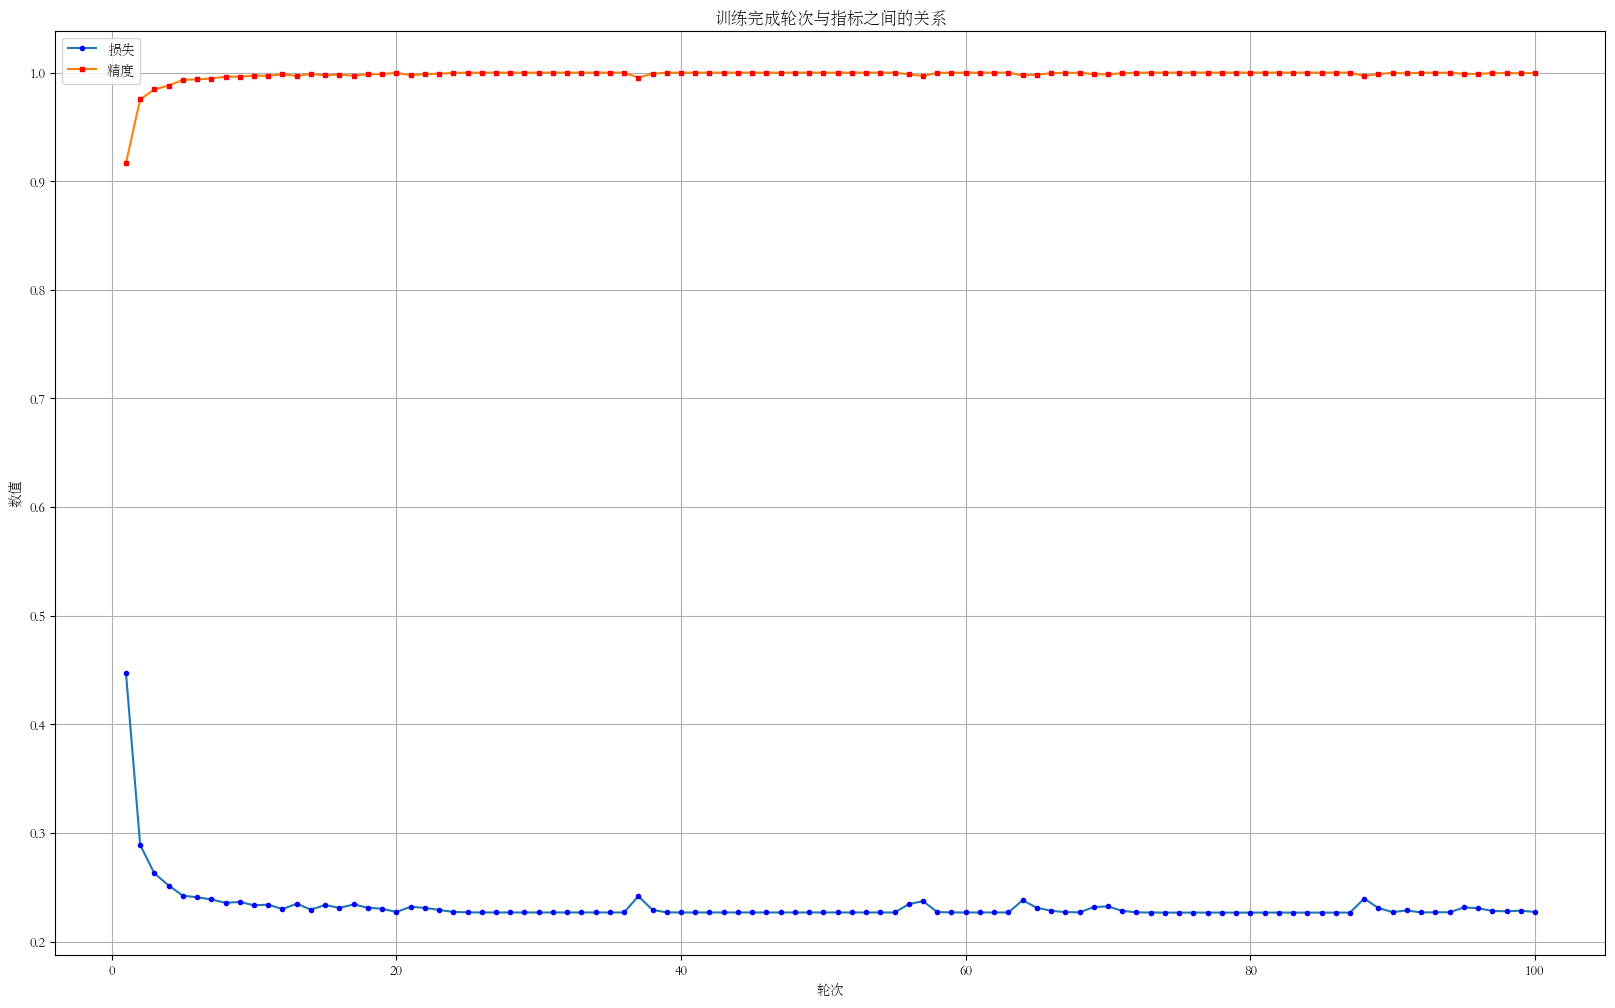

In [17]:
train_history = model.history
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'STSong'
train_time_list = range(1,epochs+1)
plt.figure(figsize=(20, 12))
plt.plot(train_time_list,train_history.history["loss"],'o-',markersize=3, markerfacecolor='blue', markeredgecolor='blue', label='损失')
plt.plot(train_time_list,train_history.history["accuracy"],'s-',markersize=3, markerfacecolor='red', markeredgecolor='red',label='精度')
plt.title('训练完成轮次与指标之间的关系')
plt.xlabel('轮次')
plt.ylabel('数值')
plt.legend()#曲线标识
plt.grid(True)#方格
plt.show()